### Breast Cancer Data Set
https://archive.ics.uci.edu/ml/datasets/breast+cancer

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("breast-cancer.csv",header=None)
le = LabelEncoder()
for label, content in df.iteritems():
    if content.dtype == "object":
        df[label] = le.fit_transform(df[label])
df1 = df.apply(pd.to_numeric, errors='coerce')
df1.fillna(0)
continuous_index =  df1.dtypes[df1.dtypes == "float64"].index.values.tolist()

In [3]:
df.dtypes

0    int64
1    int64
2    int64
3    int64
4    int64
5    int64
6    int64
7    int64
8    int64
9    int64
dtype: object

In [5]:
continuous_index

[]

In [15]:
df1

,0,1,2,3,4,5,6,7,8,9
0,0,1,2,5,0,1,3,0,2,0
1,0,2,2,3,0,1,2,1,5,0
2,0,2,2,3,0,1,2,0,2,0
3,0,4,0,2,0,1,2,1,3,0
4,0,2,2,0,0,1,2,1,4,0
...,...,...,...,...,...,...,...,...,...,...
281,1,1,2,5,0,1,2,0,3,0
282,1,1,2,3,0,1,3,0,3,1
283,1,4,0,3,0,1,1,1,3,0
284,1,2,0,5,4,1,3,0,2,0


<AxesSubplot:>

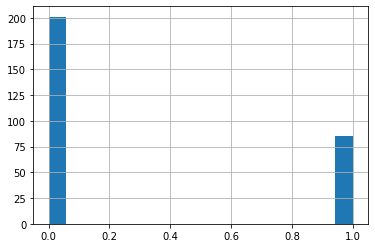

In [16]:
df1.iloc[:,0].hist(bins='sqrt')

In [3]:
df2 = pd.DataFrame()
for i in df1.dtypes.index.values.tolist():
    if(i in continuous_index):
        npa = df1.iloc[:,i].to_numpy()
        npa1 = npa[~np.isnan(npa)]
        bins = np.histogram_bin_edges(npa1)
        npa2 = np.digitize(npa, bins)
        df2.insert(loc=i,column=i,value=npa2)
    else:
        series = df1.iloc[:,i]
        df2.insert(loc=i,column=i,value=series)

In [21]:
df2

,0,1,2,3,4,5,6,7,8,9
0,0,1,2,5,0,1,3,0,2,0
1,0,2,2,3,0,1,2,1,5,0
2,0,2,2,3,0,1,2,0,2,0
3,0,4,0,2,0,1,2,1,3,0
4,0,2,2,0,0,1,2,1,4,0
...,...,...,...,...,...,...,...,...,...,...
281,1,1,2,5,0,1,2,0,3,0
282,1,1,2,3,0,1,3,0,3,1
283,1,4,0,3,0,1,1,1,3,0
284,1,2,0,5,4,1,3,0,2,0


<AxesSubplot:>

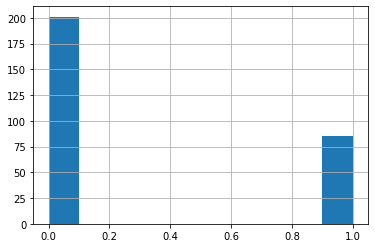

In [22]:
df2.iloc[:,0].hist()

In [5]:
header_names=[]
for i in range(0, len(df2.columns)-1):
    header_names.append('X'+str(i))
header_names.append('Y1')

oversample = SMOTE()
cols = df2.columns
X = df2.iloc[:,0:len(cols)-1]
Y = df2.iloc[:,len(cols)-1]
print("Number of rows before SMOTE: " + str(len(Y)))
X, Y = oversample.fit_resample(X, Y)
print("Number of rows after SMOTE: " + str(len(Y)))
df3 = pd.DataFrame(X)
df3['Y1'] = pd.Series(Y) 


df2.to_csv("breast-cancer-discretized.csv", index=False, header=header_names)
df3.to_csv("breast-cancer-discretized-oversampled.csv", index=False, header=header_names)

Number of rows before SMOTE: 286
Number of rows after SMOTE: 436
